In [1]:
import cv2
import pandas as pd
import glob

In [29]:
path = "/Users/boyander/IRONHACK/LEARNING/machine-learning/4-supervised-learning-face-recognition/faces-datamad1019"

fullpath = f"{path}/**/*.jpg"
print(fullpath)

faceFiles = glob.glob(fullpath)

/Users/boyander/IRONHACK/LEARNING/machine-learning/4-supervised-learning-face-recognition/faces-datamad1019/**/*.jpg


In [34]:
pics = dict()
for foto in faceFiles:
    label = foto.split("/")[-2]
    pic = foto.split("/")[-2]+"/"+foto.split("/")[-1]
    if label in pics:
        pics[label].append(pic)
    else:
        pics[label] = [pic]

In [53]:
im = []
for k,v in pics.items():
    for a in v:
        im.append([k,a])
faces_df =  pd.DataFrame(im, columns=["label","foto"])
display(faces_df)


,label,foto
0,guzman_garcia,guzman_garcia/8.jpg
1,guzman_garcia,guzman_garcia/9.jpg
2,guzman_garcia,guzman_garcia/10.jpg
3,guzman_garcia,guzman_garcia/4.jpg
4,guzman_garcia,guzman_garcia/5.jpg
...,...,...
215,maika_rodriguez,maika_rodriguez/7.jpg
216,maika_rodriguez,maika_rodriguez/6.jpg
217,maika_rodriguez,maika_rodriguez/2.jpg
218,maika_rodriguez,maika_rodriguez/3.jpg


In [55]:
faces_df.label.value_counts()

cesar_castanon      10
mario_bru           10
isa_gallego         10
cristina_rota       10
alex_mendez         10
seora_kwon          10
juanma_cruz         10
david_fernandez     10
guzman_garcia       10
celia_prieto        10
alvaro_rivas        10
javier_gomez        10
celia_pastor        10
clara_piniella      10
maika_rodriguez     10
elena_delafuente    10
maria_verdejo       10
blanca_lluch        10
julio_porto         10
antonio_pons        10
alberto_vargas      10
jorge_lopezmingo    10
Name: label, dtype: int64

In [50]:
clara = pics["clara_piniella"]
clara

['clara_piniella/8.jpg',
 'clara_piniella/9.jpg',
 'clara_piniella/10.jpg',
 'clara_piniella/4.jpg',
 'clara_piniella/5.jpg',
 'clara_piniella/7.jpg',
 'clara_piniella/6.jpg',
 'clara_piniella/2.jpg',
 'clara_piniella/3.jpg',
 'clara_piniella/1.jpg']

[[636 211 384 384]]


array([[207, 209, 209, ..., 215, 213, 214],
       [206, 209, 209, ..., 214, 215, 215],
       [206, 207, 204, ..., 215, 215, 215],
       ...,
       [ 47,  44,  41, ...,  19,  21,  24],
       [ 47,  45,  42, ...,  18,  22,  27],
       [ 49,  46,  44, ...,  19,  18,  23]], dtype=uint8)

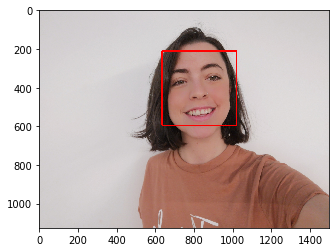

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')

def extractFace(picFile, debug=False):
    im = cv2.imread(f"{path}/{picFile}")    
    im_bw = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    #plt.imshow(im_bw, cmap="gray")
    # Face detection, OJO: esto detecta multiples caras
    faces = face_cascade.detectMultiScale(im_bw, 2, 4)

    if len(faces) == 0:
        print(f"Warning: no face detected on {picFile}")
        return 
    
    if debug:
        print(faces)
    selected_face = faces[0]
    discard_faces = faces[1:]
    
    if debug:
        debug_squares = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        # plot the invalid squares in blue
        for face in discard_faces:
            x,y,w,h = face
            debug_squares = cv2.rectangle(debug_squares, (x,y), (x+w,y+h),(0, 0, 255) ,5)
        # plot the selected face in red
        x,y,w,h = selected_face
        debug_squares = cv2.rectangle(debug_squares, (x,y), (x+w,y+h),(255, 0, 0) ,5)

        plt.imshow(debug_squares)

            
    # extract selected face as B&W 
    x,y,w,h = selected_face
    cara = im_bw[y:y+h,x:x+h]
    return cara

    
    
    
extractFace(clara[0], debug=True)

[[636 211 384 384]]
[[476  80 384 384]]
[[369 480 768 768]]
[[464 502 768 768]]
[[672 680 384 384]]
[[ 428  675  768  768]
 [  82 1814   48   48]]
[[619 142 384 384]]


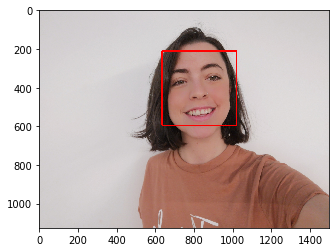

<Figure size 432x288 with 0 Axes>

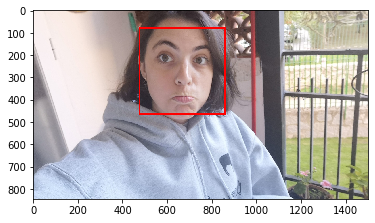

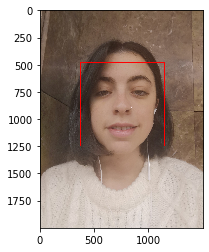

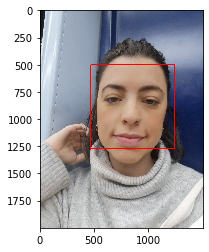

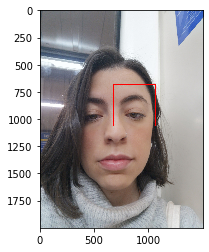

<Figure size 432x288 with 0 Axes>

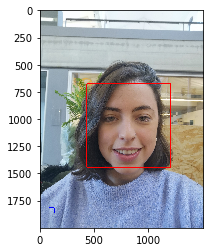

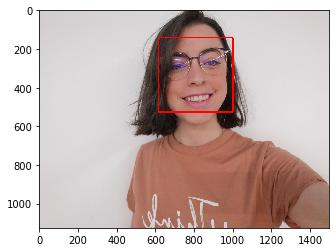

<Figure size 432x288 with 0 Axes>

In [88]:
for claraPic in clara:
    plt.figure()
    extractFace(claraPic, debug=True)

In [89]:
# Extract all faces
claraFaces = [extractFace(claraPic) for claraPic in clara]

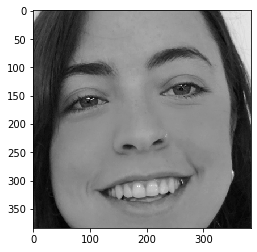

In [92]:
plt.imshow(claraFaces[0], cmap="gray")

In [105]:
import numpy as np

# Filter out invalid faces
claraFaces = [a for a in claraFaces if isinstance(a, np.ndarray)]

In [106]:
# Normalize the size of all faces
dim = (100,100)
claraNormalized = [cv2.resize(a, dim, interpolation=cv2.INTER_AREA) for a in claraFaces]

In [107]:
[a.shape for a in claraNormalized]

[(100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100)]

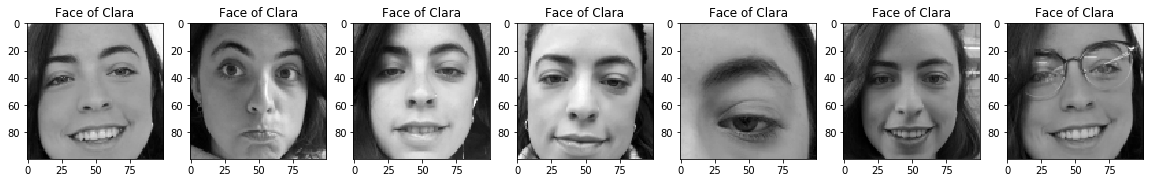

In [135]:
def printMyFace(facesImages, label):
    plt.figure(figsize=(20,5))
    for i,a in enumerate(facesImages):
        plt.subplot(1,len(facesImages), i + 1)
        plt.imshow(a, cmap="gray")
        plt.title(f"Face of {label}")

printMyFace(claraNormalized, label="Clara")

In [131]:
# Wrap all in one fn

def processFiles(files, dim=(100,100)):
    output_faces = []
    for incomingFile in files: 
        face = extractFace(incomingFile)
        if  isinstance(face, np.ndarray):
            face = cv2.resize(face, dim, interpolation=cv2.INTER_AREA)
            output_faces.append(face)
    return output_faces
            


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


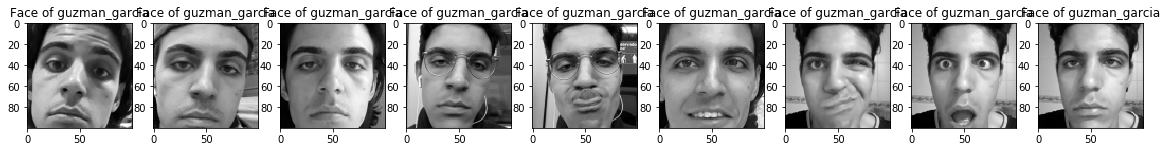

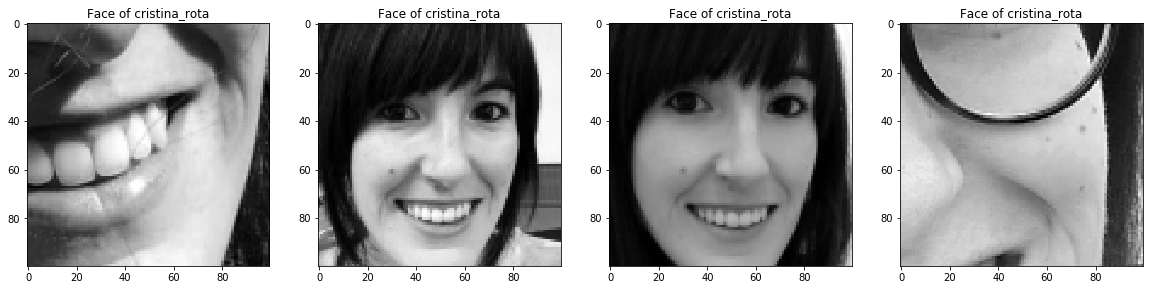

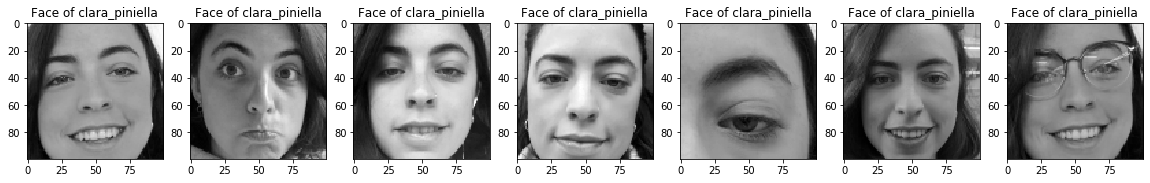

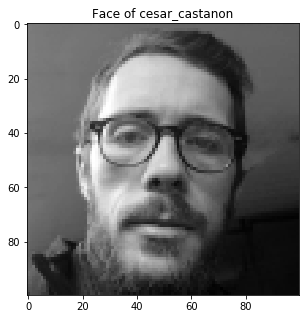

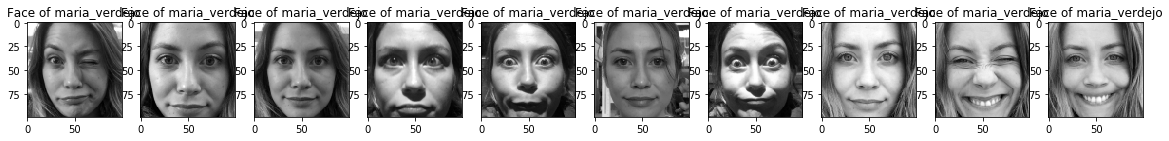

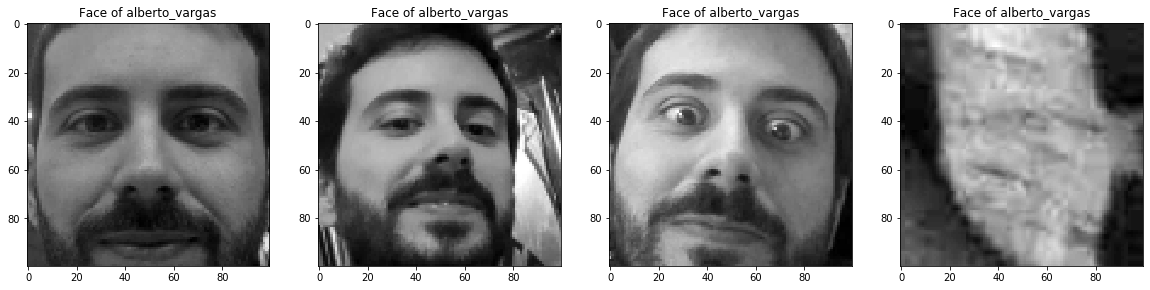

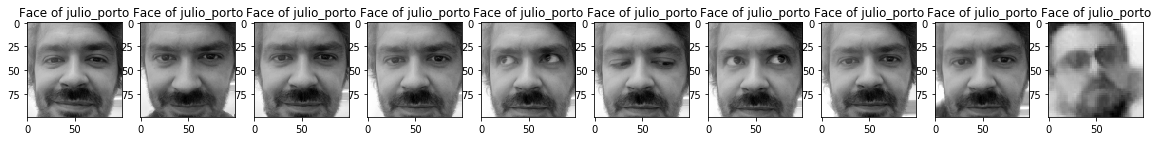

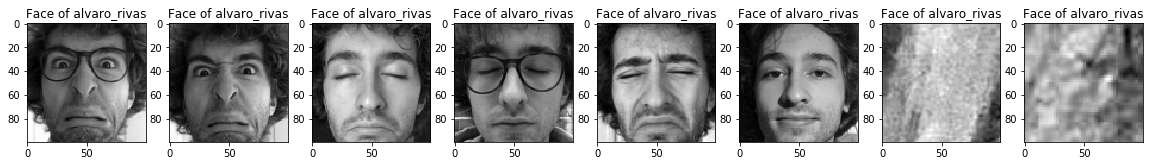

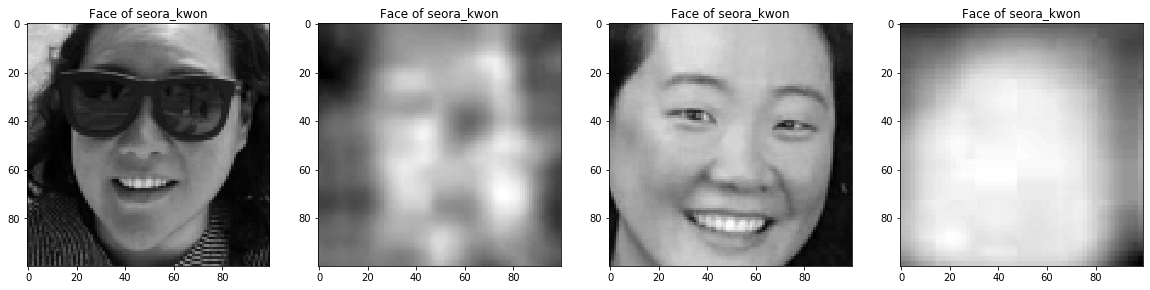

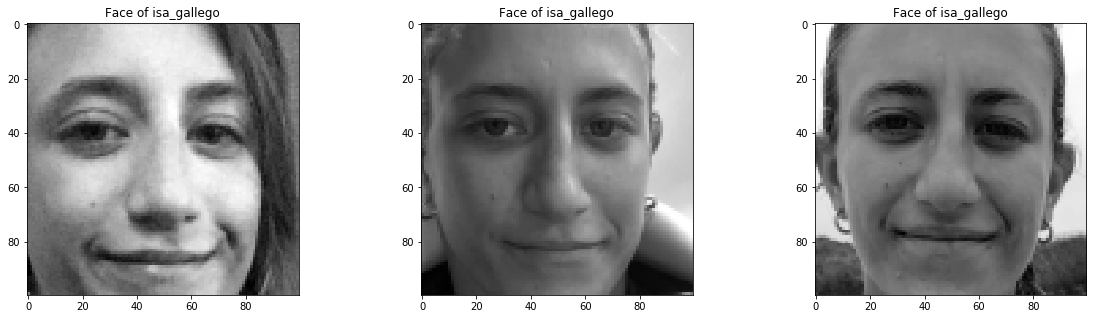

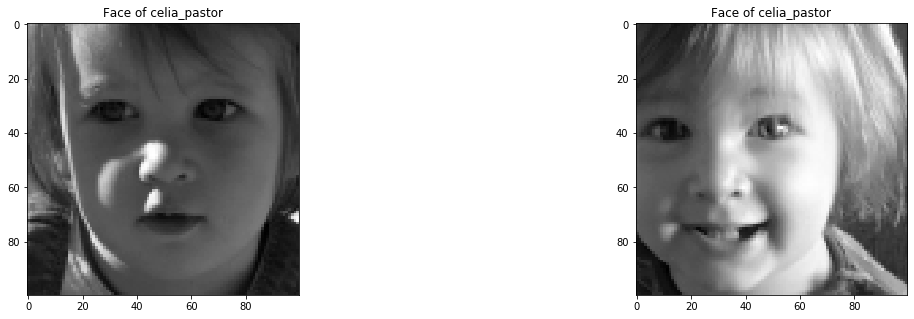

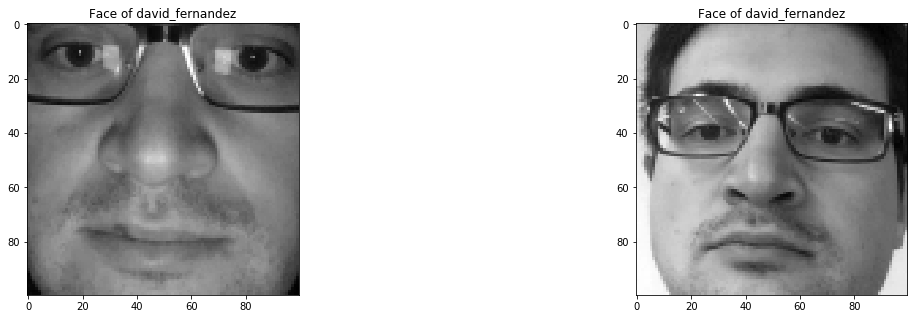

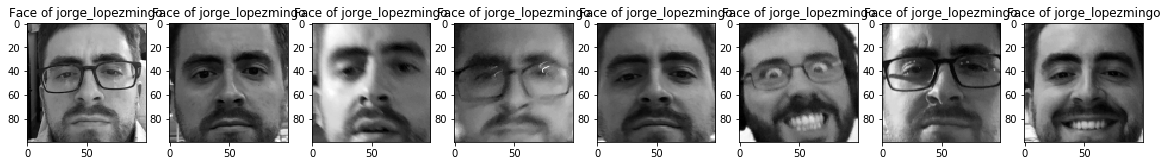

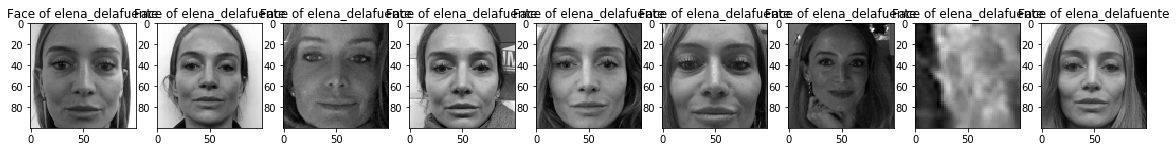

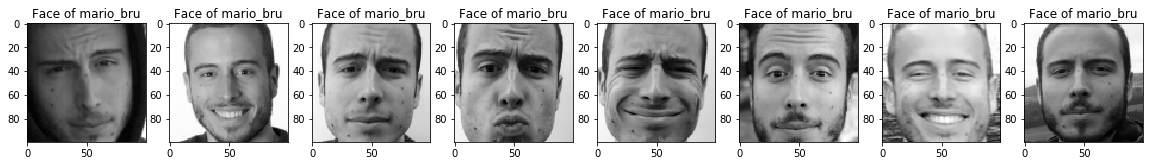

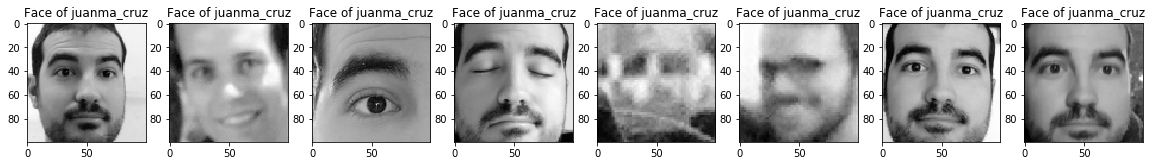

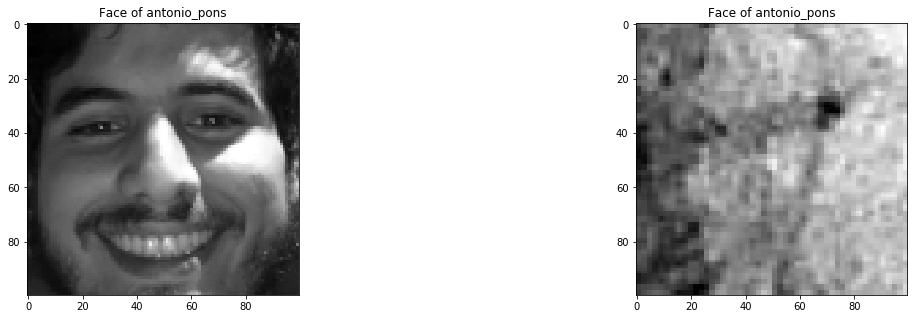

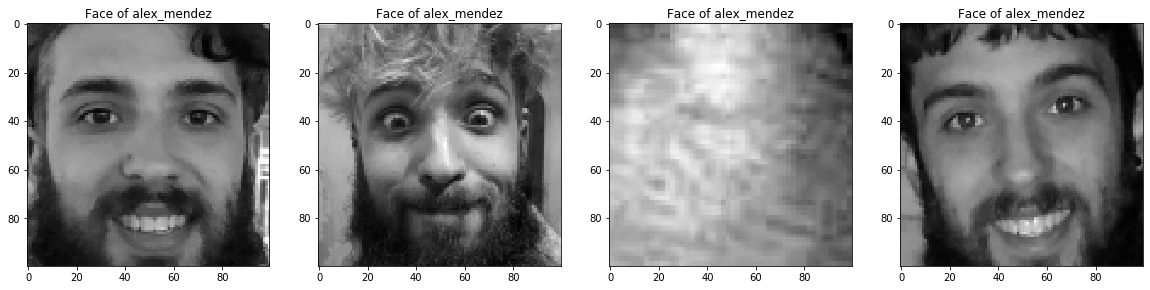

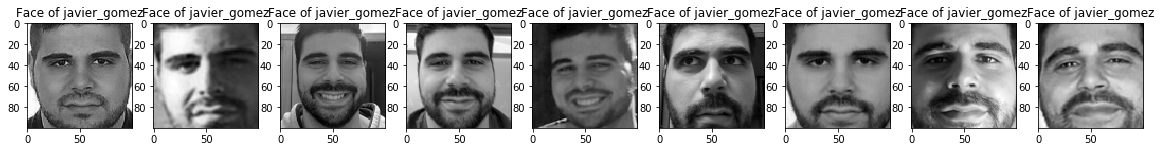

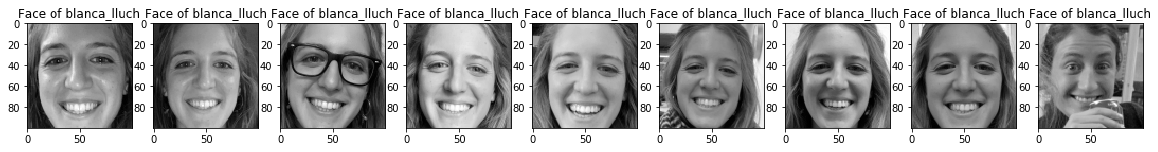

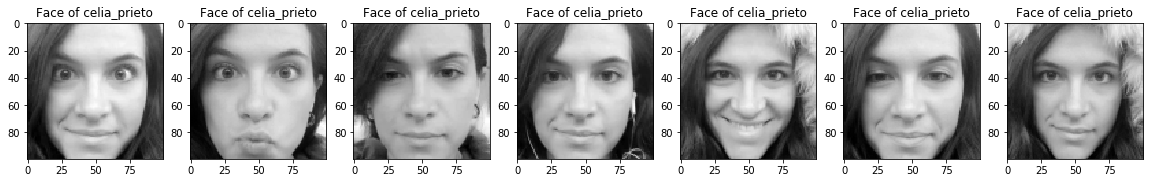

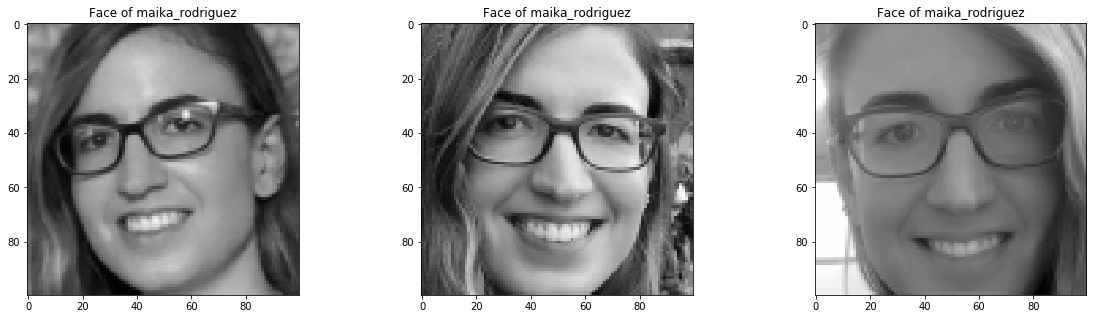

In [137]:
for label,fotos in pics.items():
    faces = processFiles(fotos)
    printMyFace(faces,label=label)
